## Fixed Random Seed

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import re
import tensorflow as tf
import warnings
from tensorflow.keras import models, layers
# from google.colab import drive


# Ignore warings
warnings.filterwarnings("ignore", category=UserWarning)

# Config retina
%config InlineBackend.figure_format = 'retina'

# Fixing seeds
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(44)

## 데이터 불러오기 및 확인

In [332]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

display(train.head(10))
display(test.head(10))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
5,TRAIN_00005,55,F,High graduate,Full-Time,50,Retail,Services,White,All other,...,Native,US,US,US,Single,0,0,560,Under Median,300
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0
8,TRAIN_00008,24,F,Bachelors degree,Children or Armed Forces,52,Retail,Sales,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
9,TRAIN_00009,53,M,High graduate,Seeking Full-Time,30,Construction,Machine Operators & Inspectors,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
5,TEST_0005,31,M,High Freshman,Full-Time,24,Construction,Transportation,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
6,TEST_0006,17,M,High Freshman,Full-Time,51,Retail,Services,White,All other,...,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median
7,TEST_0007,11,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median
8,TEST_0008,71,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median
9,TEST_0009,43,M,College,Full-Time,52,Transportation,Admin Support (include Clerical),Black,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown


In [333]:
train.shape, test.shape

((20000, 23), (10000, 22))

In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [338]:
# Remove special characters and replace spaces with underscores in column names
train.columns = train.columns.str.replace('(', '', regex=False) \
                               .str.replace(')', '', regex=False) \
                               .str.replace(' ', '_', regex=False)
test.columns = test.columns.str.replace('(', '', regex=False) \
                              .str.replace(')', '', regex=False) \
                              .str.replace(' ', '_', regex=False)

In [368]:
train['Education_Status'].value_counts()

Education_Status
High graduate                     6389
College                           3723
Children                          2208
Bachelors degree                  1856
High Junior                        813
High Sophomore                     794
Associates degree (Vocational)     716
Associates degree (Academic)       589
High Freshman                      552
Middle (7-8)                       546
Masters degree                     466
Elementary (5-6)                   317
High Senior                        241
Elementary (1-4)                   149
Professional degree                102
Doctorate degree                    78
Kindergarten                        64
Name: count, dtype: int64

In [371]:
# Select object columns
object_cols = list(train.select_dtypes(include=['object']).columns)

# Correctly formatted regex pattern to match the special characters you listed
pattern = r'[#@&\[\]<()]'

# Remove special characters in object columns
for col in object_cols:
    train[col] = train[col].str.replace(pattern, '', regex=True)
    test[col] = test[col].str.replace(pattern, '', regex=True)

In [372]:
train['Education_Status'].value_counts()

Education_Status
High graduate                   6389
College                         3723
Children                        2208
Bachelors degree                1856
High Junior                      813
High Sophomore                   794
Associates degree Vocational     716
Associates degree Academic       589
High Freshman                    552
Middle 7-8                       546
Masters degree                   466
Elementary 5-6                   317
High Senior                      241
Elementary 1-4                   149
Professional degree              102
Doctorate degree                  78
Kindergarten                      64
Name: count, dtype: int64

In [339]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [374]:
train.describe(include='all')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week_Yearly,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Gains,Losses,Dividends,Income_Status,Income
count,19603,19603.000000,19603,19603,19603,19603.000000,19603,19603,19603,19603,...,19603,19603,19603,19603,19603,19603.000000,19603.000000,19603.000000,19603,19603.000000
unique,19603,NaN,2,17,8,NaN,24,15,5,10,...,5,43,43,43,6,NaN,NaN,NaN,3,NaN
top,TRAIN_00000,NaN,F,High graduate,Children or Armed Forces,NaN,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 MFJ,NaN,NaN,NaN,Under Median,NaN
freq,1,NaN,10338,6389,10962,NaN,4688,4688,16502,17393,...,17469,17469,16233,16262,8333,NaN,NaN,NaN,13069,NaN
mean,NaN,35.484926,NaN,NaN,NaN,34.675611,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,365.650819,38.865837,117.276539,NaN,500.472224
std,NaN,18.077832,NaN,NaN,NaN,22.355240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4099.885394,274.753509,1141.314755,NaN,546.230365
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,23.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,34.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,465.000000
75%,NaN,47.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,834.000000


In [375]:
train.describe()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Income
count,19603.000000,19603.000000,19603.000000,19603.000000,19603.000000,19603.000000
mean,35.484926,34.675611,365.650819,38.865837,117.276539,500.472224
std,18.077832,22.355240,4099.885394,274.753509,1141.314755,546.230365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,465.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,834.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,2178.000000


In [376]:
train.describe(include='object')

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Income_Status
count,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603
unique,19603,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 MFJ,Under Median
freq,1,10338,6389,10962,4688,4688,16502,17393,9287,5885,8279,17469,17469,16233,16262,8333,13069


In [377]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

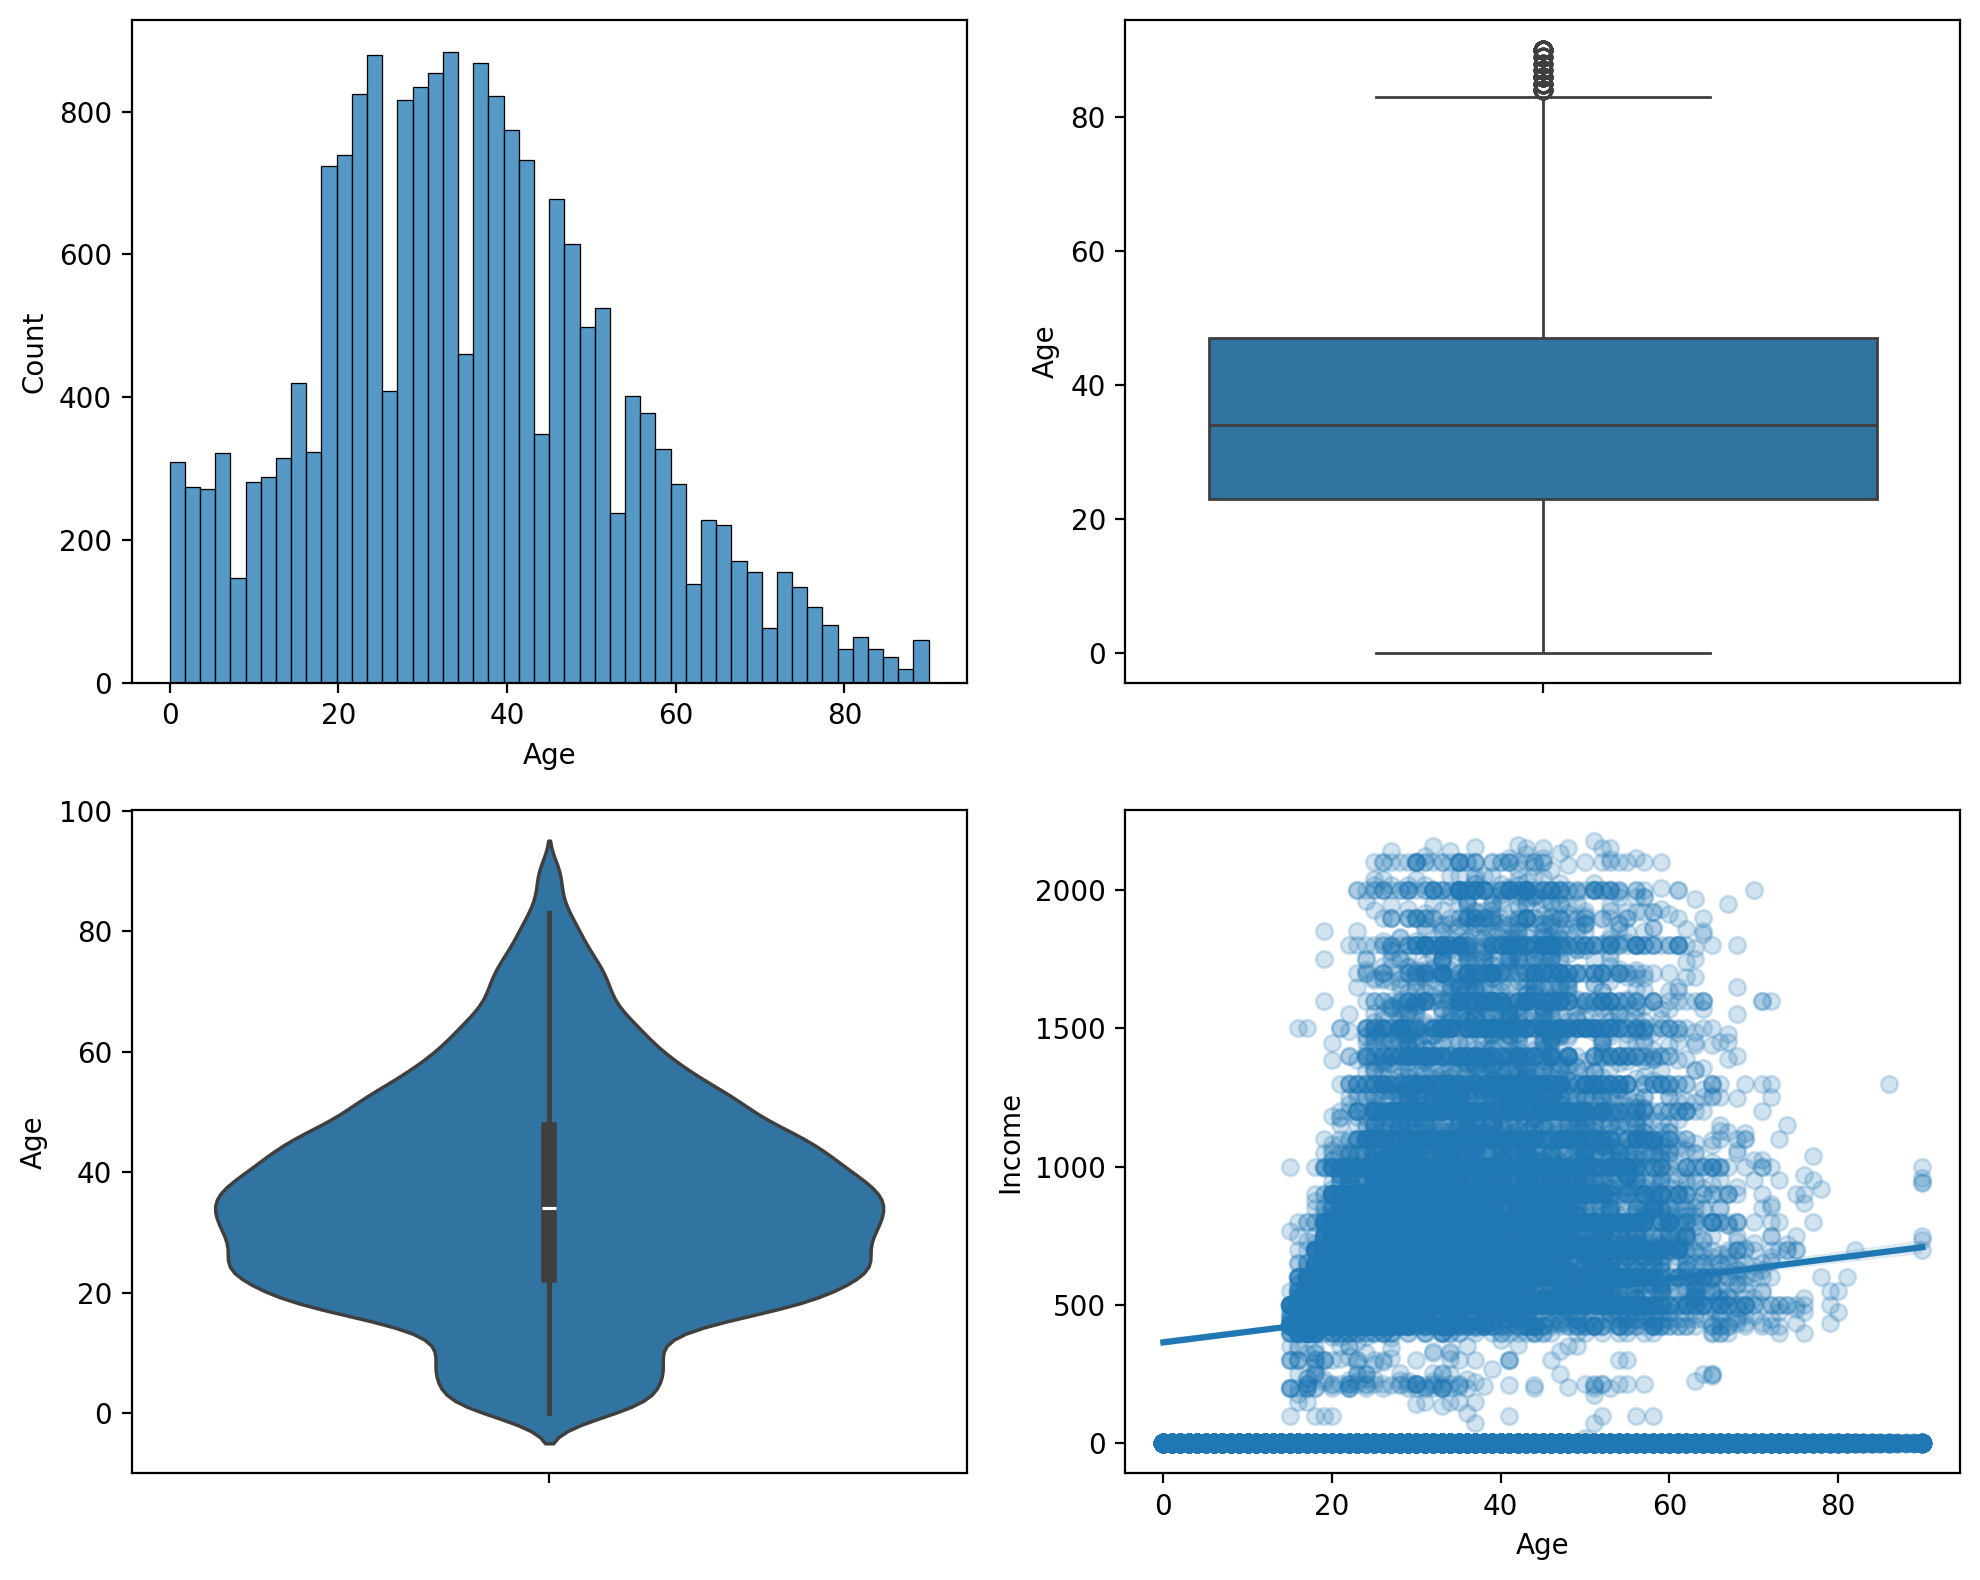

In [378]:
col = train['Age']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.violinplot(col, ax=ax[1][0])
sns.regplot(x=col, y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()  

In [379]:
train.describe(include='object')

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Income_Status
count,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603,19603
unique,19603,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 MFJ,Under Median
freq,1,10338,6389,10962,4688,4688,16502,17393,9287,5885,8279,17469,17469,16233,16262,8333,13069


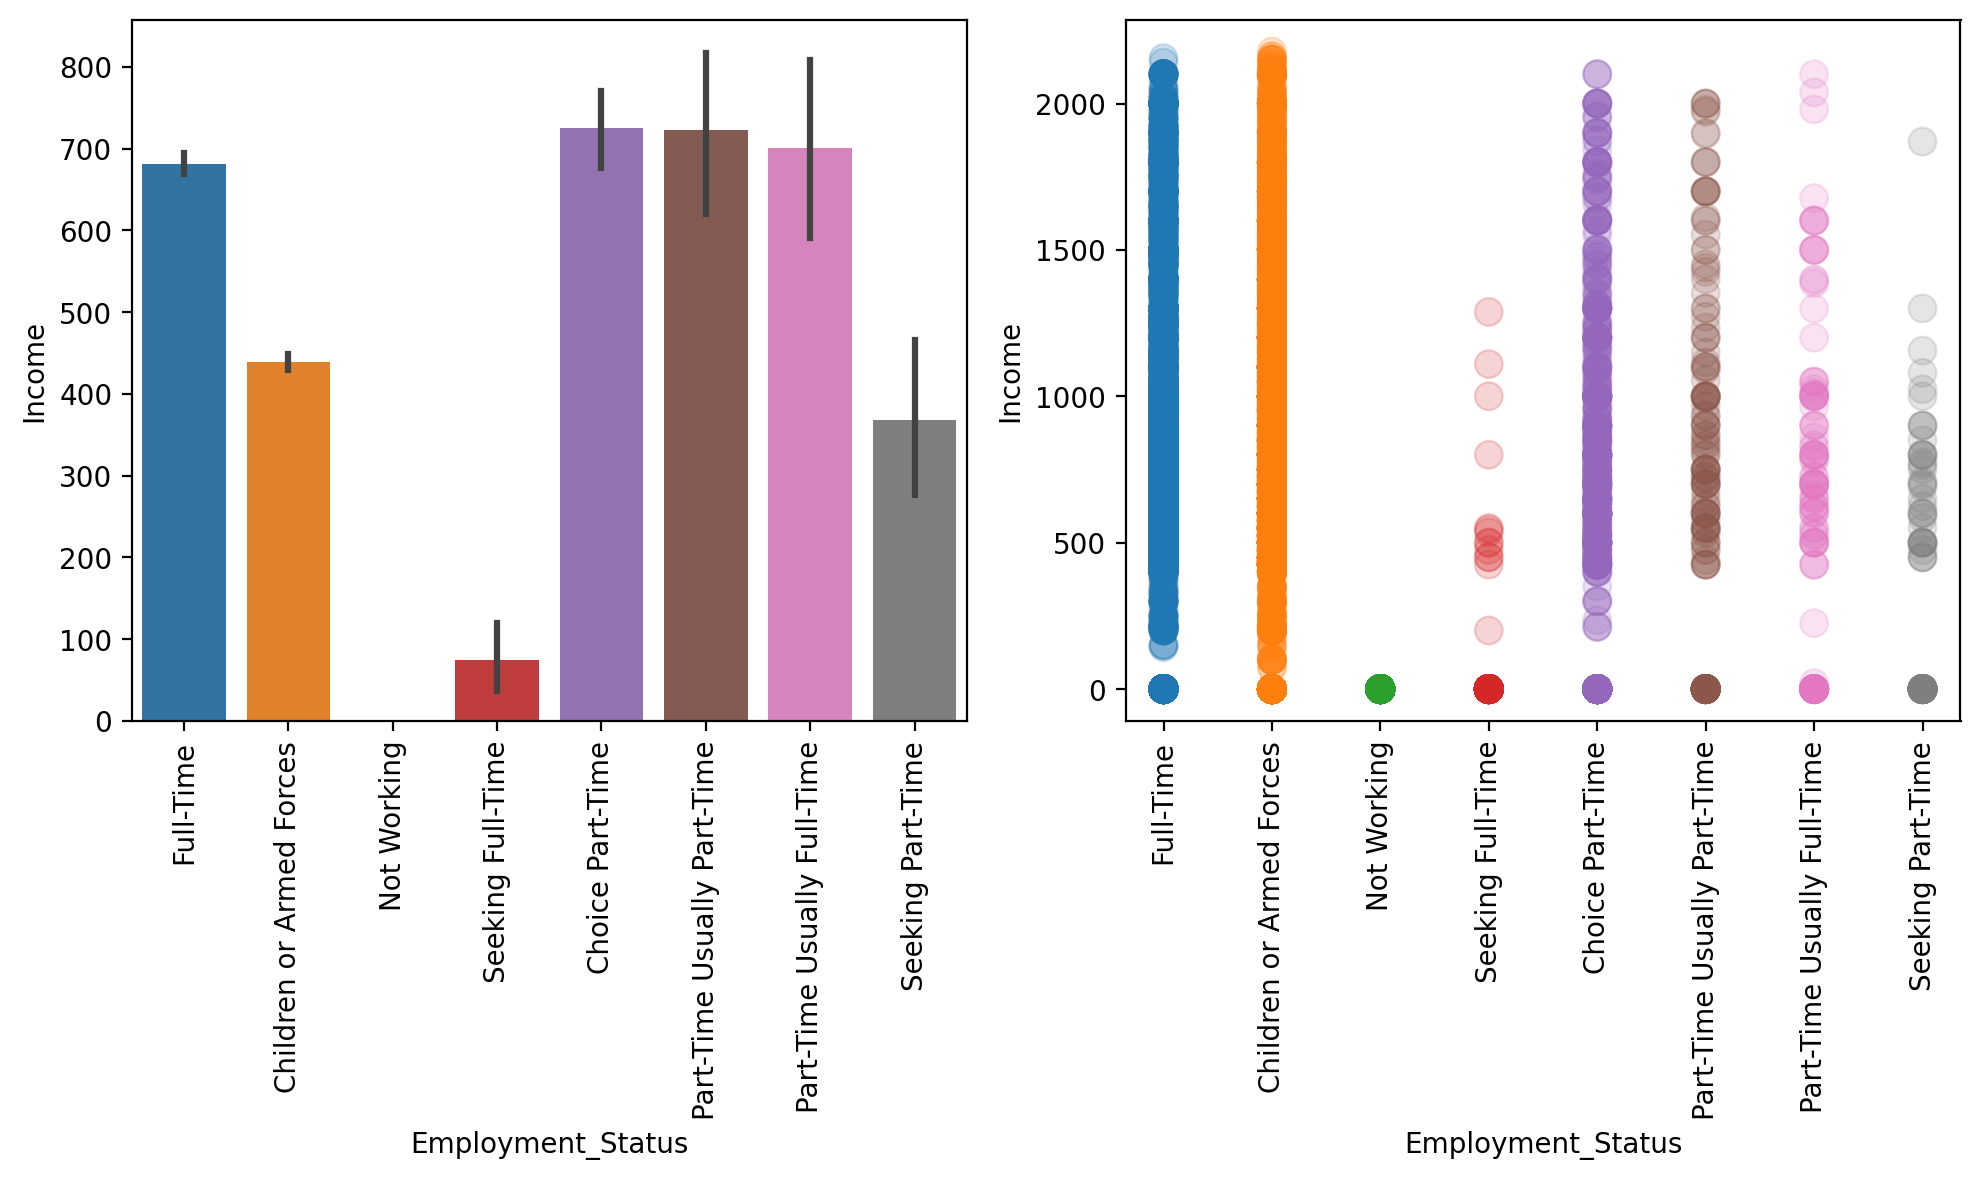

In [380]:
col = train['Employment_Status']
f, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s=100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()


In [381]:
train['Income'].value_counts()

Income
0       8697
500      743
700      550
600      547
800      526
        ... 
1358       1
2123       1
1765       1
989        1
1304       1
Name: count, Length: 1095, dtype: int64

<Axes: >

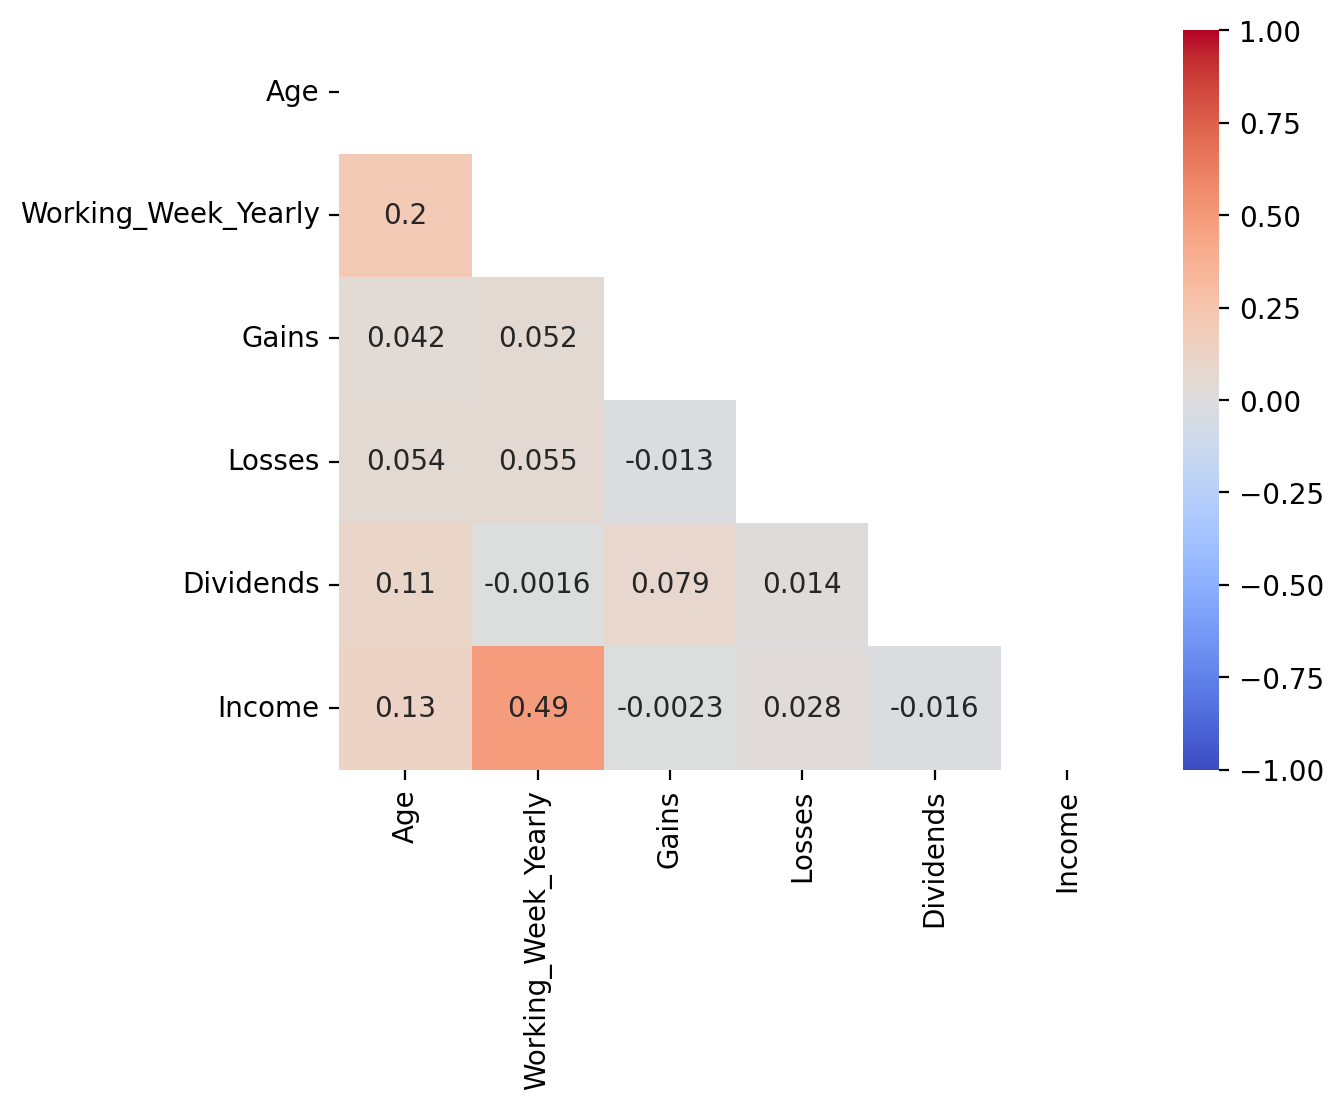

In [382]:
import numpy as np

# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number])

corr = numeric_cols.corr()  # Compute the correlation matrix for numeric columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, mask=mask)


In [383]:
train.isna().sum()

ID                      0
Age                     0
Gender                  0
Education_Status        0
Employment_Status       0
Working_Week_Yearly     0
Industry_Status         0
Occupation_Status       0
Race                    0
Hispanic_Origin         0
Martial_Status          0
Household_Status        0
Household_Summary       0
Citizenship             0
Birth_Country           0
Birth_Country_Father    0
Birth_Country_Mother    0
Tax_Status              0
Gains                   0
Losses                  0
Dividends               0
Income_Status           0
Income                  0
dtype: int64

In [384]:
# drop columns outlier based 1.5 IQR of Income
Q1 = train['Income'].quantile(0.25)
Q3 = train['Income'].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train['Income'] < (Q1 - 1.5 * IQR)) | (train['Income'] > (Q3 + 1.5 * IQR)))]

In [385]:
train.shape

(19537, 23)

## 데이터 전처리 1 : 학습 및 추론 데이터 설정

In [386]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

## 데이터 전처리 2 : 범주형 변수 수치화

In [164]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    
    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_x[i] = train_x[i].astype(str)
    test_x[i] = test_x[i].astype(str)
    
    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test_x[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case)
    
    test_x[i] = le.transform(test_x[i])

In [392]:
train_x = pd.DataFrame(train_x, columns=train_x.columns)
test_x = pd.DataFrame(test_x, columns=test_x.columns)

# Select object columns
encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

# Apply one-hot encoding
train_x = pd.get_dummies(train_x, columns=encoding_target)
test_x = pd.get_dummies(test_x, columns=encoding_target)

# Align train and test data to ensure they have the same columns
train_x, test_x = train_x.align(test_x, join='left', axis=1)

# Fill NaN values (if any) with 0
test_x.fillna(0, inplace=True)

In [393]:
train_x.head(10)

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,63,4,0,0,0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,37,52,0,0,0,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,58,52,3411,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,44,52,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,37,52,0,0,0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
5,55,50,0,0,560,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
6,67,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
7,64,5,0,0,2052,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,24,52,0,0,0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
9,53,30,0,0,0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [394]:
train_y.head()

0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

In [395]:
test_x.head()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,79,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,47,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,18,52,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,39,30,0,0,0,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,6,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [396]:
train_x.isnull().sum(), test_x.isnull().sum()

(Age                           0
 Working_Week_Yearly           0
 Gains                         0
 Losses                        0
 Dividends                     0
                              ..
 Tax_Status_Nonfiler           0
 Tax_Status_Single             0
 Income_Status_Over Median     0
 Income_Status_Under Median    0
 Income_Status_Unknown         0
 Length: 275, dtype: int64,
 Age                           0
 Working_Week_Yearly           0
 Gains                         0
 Losses                        0
 Dividends                     0
                              ..
 Tax_Status_Nonfiler           0
 Tax_Status_Single             0
 Income_Status_Over Median     0
 Income_Status_Under Median    0
 Income_Status_Unknown         0
 Length: 275, dtype: int64)

# Scaling

In [397]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [398]:
print(type(train_x))

<class 'numpy.ndarray'>


In [399]:
train_x[:10]

array([[ 1.52102464, -1.36871749, -0.08899821, ..., -0.17891615,
        -1.4152457 ,  1.52031442],
       [ 0.08448236,  0.77688418, -0.08899821, ..., -0.17891615,
         0.70659109, -0.65775868],
       [ 1.24476651,  0.77688418,  0.74182118, ..., -0.17891615,
         0.70659109, -0.65775868],
       ...,
       [ 1.57627627, -1.32401745, -0.08899821, ..., -0.17891615,
         0.70659109, -0.65775868],
       [-0.63378878,  0.77688418, -0.08899821, ..., -0.17891615,
         0.70659109, -0.65775868],
       [ 0.96850838, -0.20651659, -0.08899821, ..., -0.17891615,
         0.70659109, -0.65775868]])

In [400]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [403]:
test_x.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [402]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Convert feature names to strings and remove any characters that are not allowed
feature_names = [str(feature).replace('[', '').replace(']', '').replace('<', '') for feature in train_x.columns]


models = {LinearRegression(): 'LinearRegression',
      SGDRegressor(): 'SGDRegressor',
      # LogisticRegression(max_iter=10000): 'LogisticRegression',
      RandomForestRegressor(): 'RandomForestRegressor',
      SVR(): 'SVR',
      XGBRegressor(): 'XGBRegressor'}

for model in models.keys():
  model.fit(train_x, train_y)
  pred = model.predict(val_x)
  mse = mean_squared_error(val_y, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(val_y, pred)
  print(f'{models[model]}: RMSE {rmse} R^2 {r2}')  # Fix: Add the missing variable inside the curly braces


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## 1-4 DNN model design

In [269]:
from tensorflow.keras import models, layers
import keras

model = models.Sequential()
model.add(layers.Input(shape=(21,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               2816      
                                                                 
 batch_normalization_17 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_17 (Activation)  (None, 128)               0         
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                                    

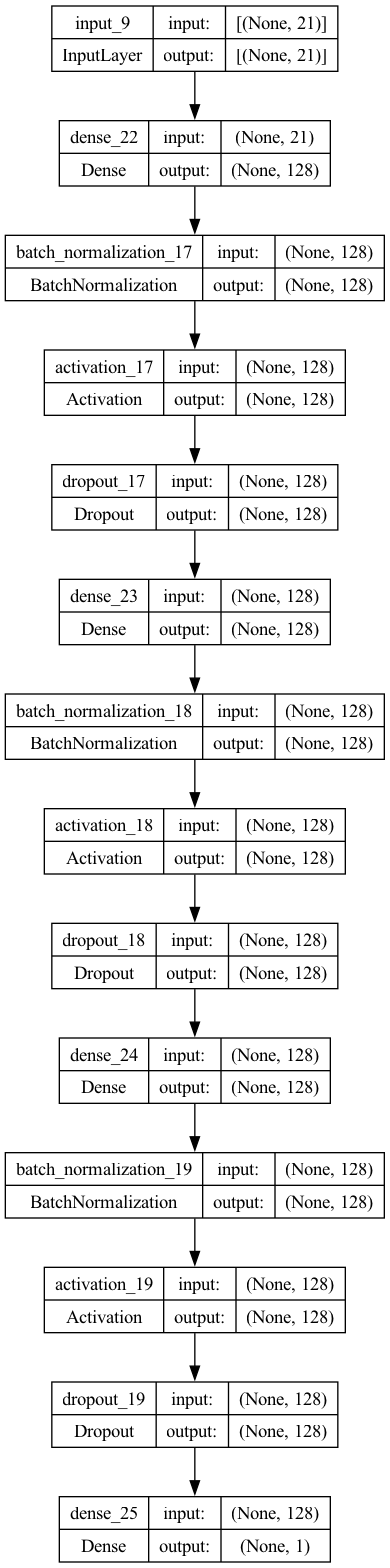

In [270]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## 1-5 Complie model and training

In [271]:
from keras.optimizers import SGD, Adam, Adamax, Adagrad, Adadelta, RMSprop
from keras import backend as K


# Define the optimizer with the learning rate
optimizer = Adam()

def root_mean_squared_error(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compile the model with the optimizer
model.compile(loss=root_mean_squared_error,
              optimizer=optimizer,
              metrics=['mae'])

In [272]:
from tabnanny import verbose
from keras.callbacks import LearningRateScheduler

# Define the learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_lr * (drop_rate ** (epoch // epochs_drop))

lr_scheduler_cb = LearningRateScheduler(lr_schedule)

check_point_cb = callbacks.ModelCheckpoint('dacon_model.keras', 
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_x, train_y, 
                     epochs=100,
                     validation_data=(val_x, val_y),
                     verbose=1,
                     callbacks=[check_point_cb, early_stopping_cb, lr_scheduler_cb])

train_x, val_x, train_y, val_y

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [88]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


In [89]:

def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_mae')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

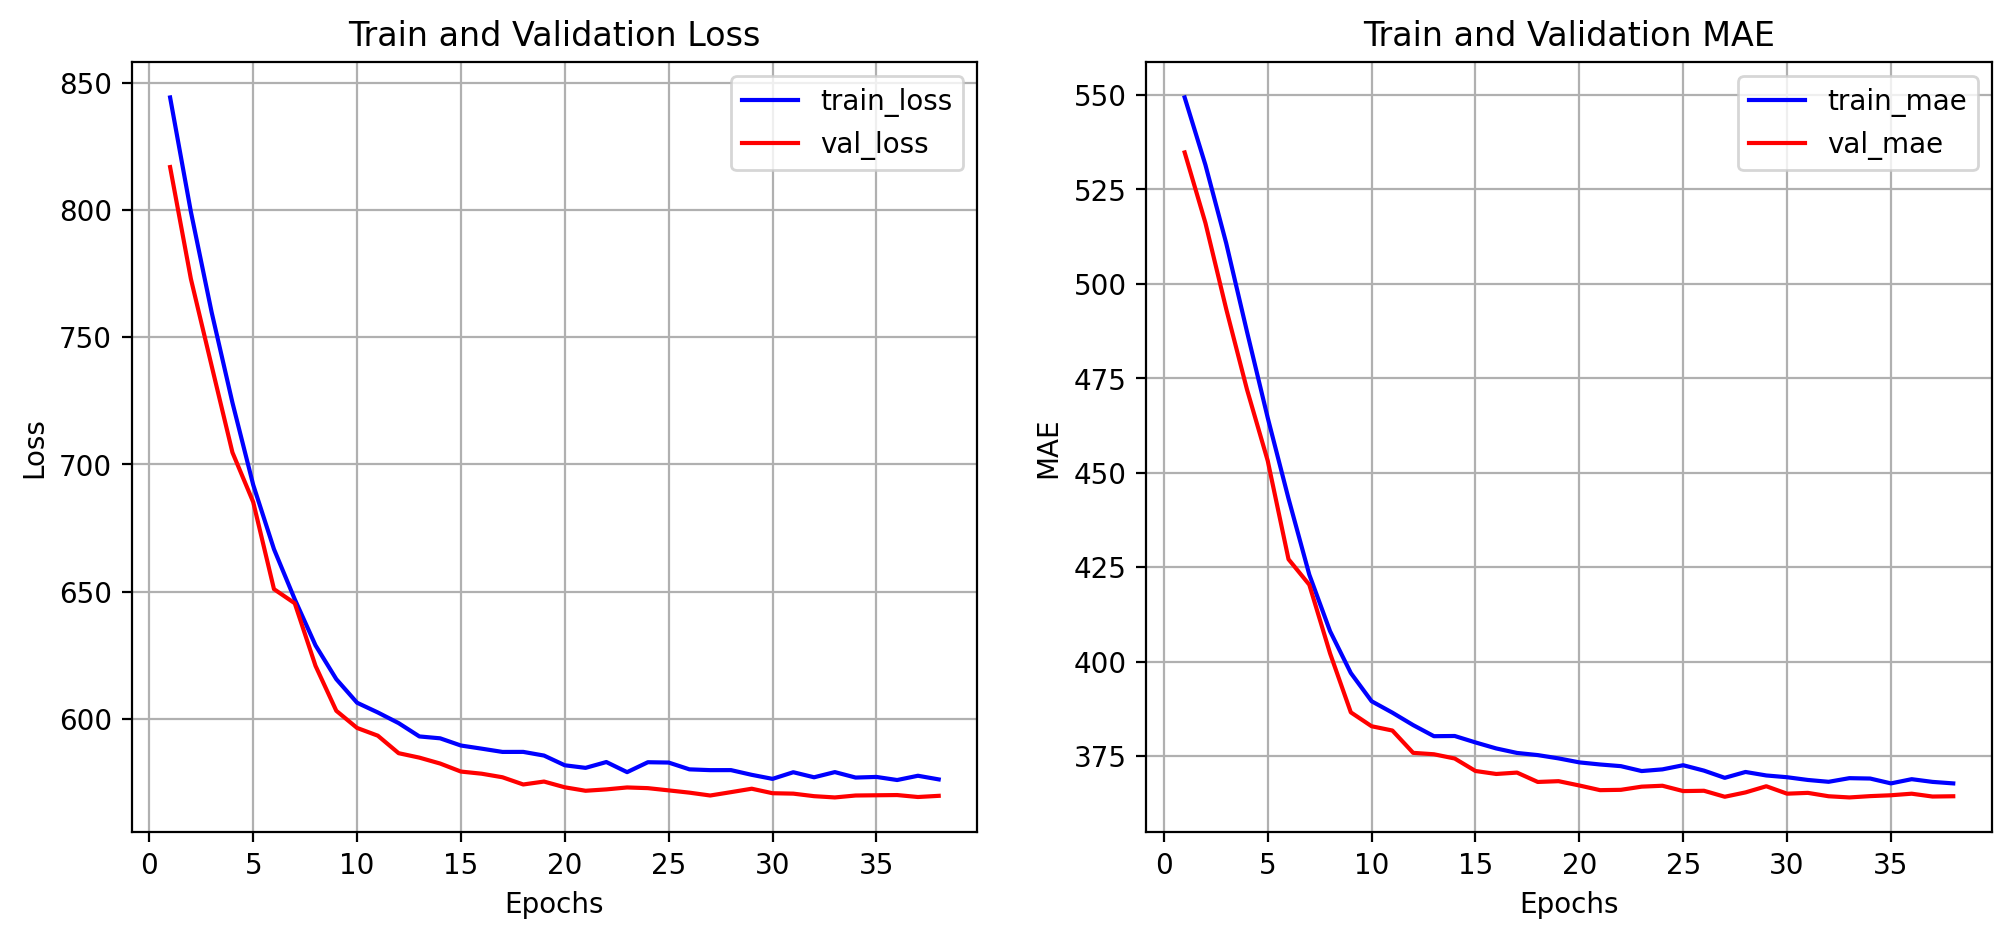

In [90]:
show_history_r(history)

125/125 [==============================] - 1s 4ms/step


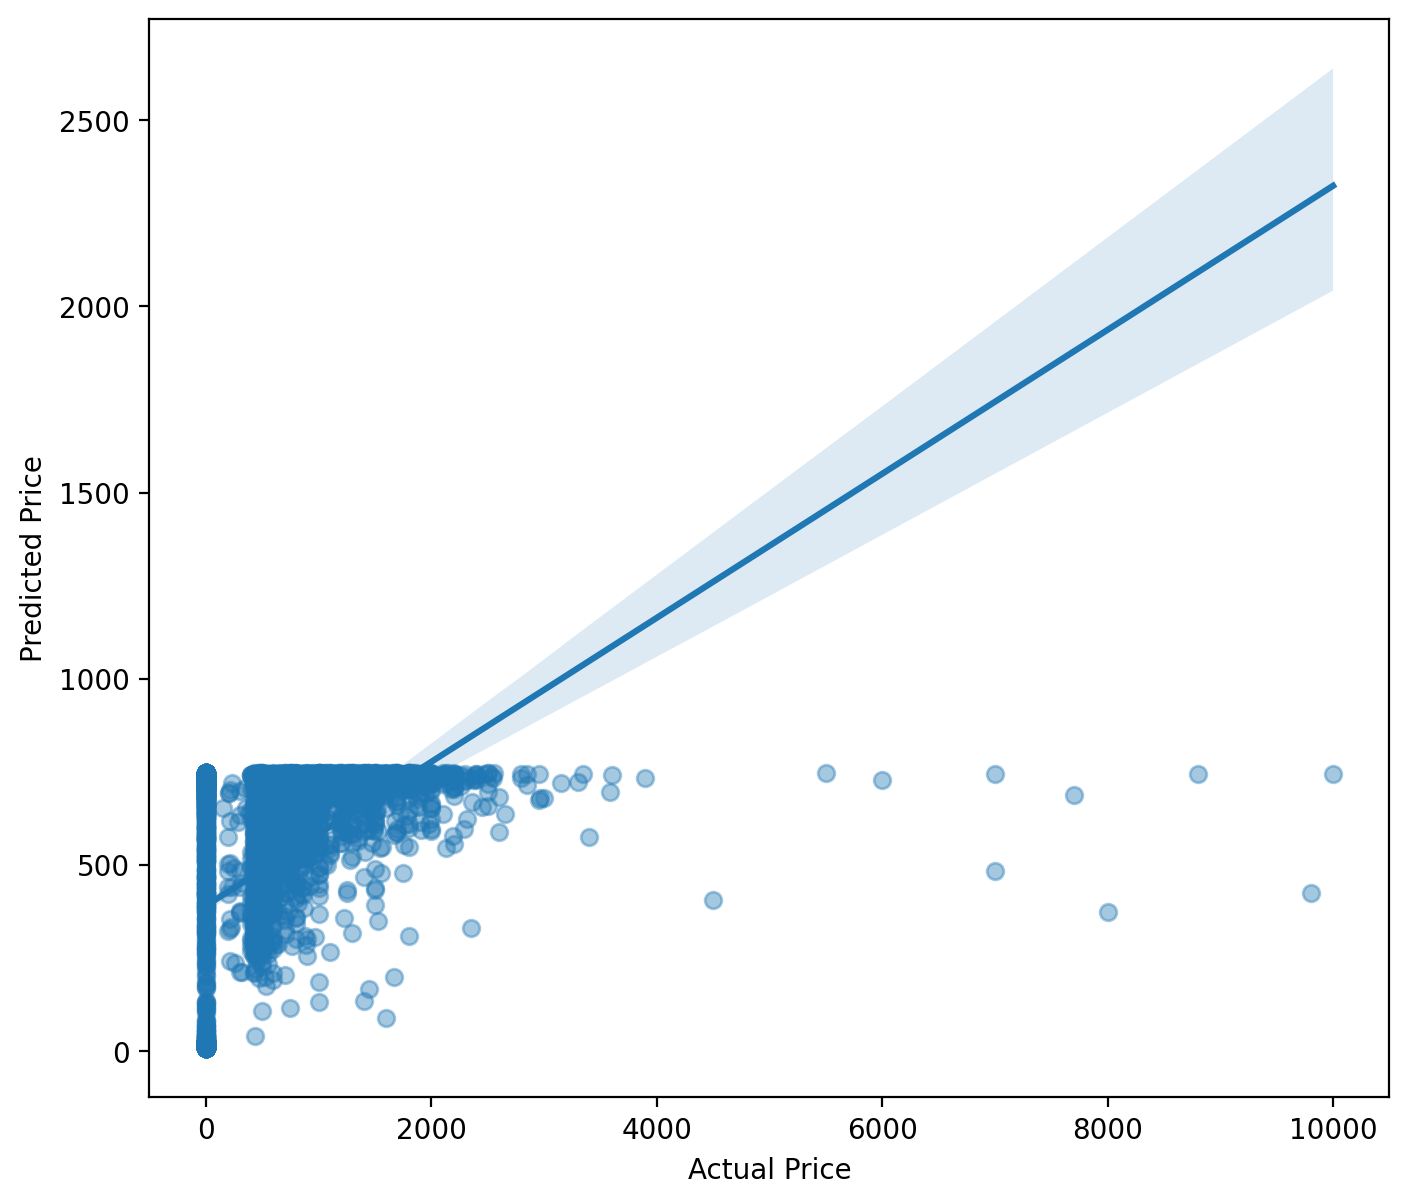

In [91]:
pred_y = model.predict(val_x)
plt.figure(figsize=(8, 7))
sns.regplot(x = val_y, y = pred_y, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()  

## 예측 수행

In [36]:
preds = model.predict(test_x)

313/313 [==============================] - 1s 4ms/step


## 제출양식에 예측결과 입력

In [37]:
submission = pd.read_csv('./sample_submission.csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,9.838421
1,TEST_0001,12.287467
2,TEST_0002,423.378082
3,TEST_0003,901.591370
4,TEST_0004,12.851710
...,...,...
9995,TEST_9995,699.994080
9996,TEST_9996,926.281067
9997,TEST_9997,363.486664
9998,TEST_9998,15.557644


## 예측결과 저장

In [38]:
submission.to_csv('./dacon_submission03.csv', index=False)